# Case Study: Stock Market

There are two approaches in stock-trade analysis:

1. **techniqual**: Strictly looks over the past stock trends, and uses statistical and machine learning means to determine or predict future price movements.
2. **fundamental**: Is an analysis over the company itself. From a macro perspective, to the over conditions, news and events, financial conditions, management, competitors, etc.


## Important Terms

1. **Dow Jones Industrial Average (DJIA)**: An index that represents a significant portion of the stocks. This is effectively a weighted average of stocks, so it can be used as a highlight of how the overall stock market is doing. The market fluctuates every microsecond, the DJIA provides the following key summary statistics
    1. **Open:** The starting price for a given trading day
    2. **Close:** The final price on that day
    3. **High:** The highest prices at which the stock traded on that day
    4. **Low:** The lowest prices at which the stock traded on that day
    5. **Volume:** The total number of shares traded before the market is closed on that day.
    

## Model Features

* The original features:
    * Open price: $\text{Open(day=i)}$
    * Open price on the past day: $\text{Open(day=i-1)}$
    * Close price on the past day: $\text{Close(day=i-1)}$
    * Highest price on the past day: $\text{High(day=i-1)}$
    * Lowest price on the past day: $\text{Low(day=i-1)}$
    * Volume on the past day: $\text{Volume(day=i-1)}$
* Engineered Features:
    * Average close price:
        * The average close price over the past five days: $A = \frac{1}{5}\sum_{i=1}^{5} \text{Close(day=i)}$
        * The average close price over the past month: $B = \frac{1}{30}\sum_{i=1}^{30} \text{Close(day=i)}$
        * The average close price over the past year: $C = \frac{1}{365}\sum_{i=1}^{365} \text{Close(day=i)}$
    * Ratio combinations of average close price:
        * The ratio between the average price over the past week and that over the past month: $\frac{A}{B}$
        * The ratio between the average price over the past week and that over the past year: $\frac{A}{C}$
        * The ratio between the average price over the past month and that over the past year: : $\frac{B}{C}$
    * Average volume:
        * The average volume over the past five days: $D = \frac{1}{5}\sum_{i=1}^{5} \text{Volume(day=i)}$
        * The average volume over the past month: $E = \frac{1}{30}\sum_{i=1}^{30} \text{Volume(day=i)}$
        * The average volume over the past year: $F = \frac{1}{365}\sum_{i=1}^{365} \text{Volume(day=i)}$
    * Ratio combinations of average volume:
        * The ratio between the average volume over the past week and that over the past month: $\frac{D}{E}$
        * The ratio between the average volume over the past week and that over the past year: $\frac{D}{F}$
        * The ratio between the average volume over the past month and that over the past year: $\frac{E}{F}$
    * Average volitility of closing prices
        * The standard deviation of the close prices over the past five days: $G = \frac{1}{5}\sum_{i=1}^{5} \text{SD_close(day=i)}$
        * The standard deviation of the close prices over the past month: $H = \frac{1}{30}\sum_{i=1}^{30} \text{SD_close(day=i)}$
        * The standard deviation of the close prices over the past year: $I = \frac{1}{365}\sum_{i=1}^{365} \text{SD_close(day=i)}$
    * Ratio combinations of average volitility in closing:
        * The ratio between the standard deviation of the prices over the past week and that over the past month: $\frac{G}{H}$
        * The ratio between the standard deviation of the prices over the past week and that over the past year: $\frac{G}{I}$ 
        * The ratio between the standard deviation of the prices over the past month and that over the past year: $\frac{H}{I}$
    * Average volitility in volume:
        * The standard deviation of the volumes over the past five days: $J = \frac{1}{5}\sum_{i=1}^{5} \text{SD_vol(day=i)}$
        * The standard deviation of the volumes over the past month: $K = \frac{1}{30}\sum_{i=1}^{30} \text{SD_vol(day=i)}$
        * The standard deviation of the volumes over the past year: $L = \frac{1}{365}\sum_{i=1}^{365} \text{SD_vol(day=i)}$
    * Ratio combinations of average volitility of volume:
        * The ratio between the standard deviation of the volumes over the past week and that over the past month: $\frac{J}{K}$
        * The ratio between the standard deviation of the volumes over the past week and that over the past year: $\frac{J}{L}$
        * The ratio between the standard deviation of the volumes over the past month and that over the past year: $\frac{K}{L}$
    * Return (percentage gain or loss of the stock relative to the past day, week, month and year):
        * Daily return of the past day: $\frac{\text{Close(day=i)} - \text{Close(day=i-1)}}{\text{Close(day=i-1)}}$
        * Weekly return of the past week: $\frac{\text{Close(day=i)} - \text{Close(day=i-5)}}{\text{Close(day=i-5)}}$
        * Monthly return of the past month: $\frac{\text{Close(day=i)} - \text{Close(day=i-30)}}{\text{Close(day=i-30)}}$
        * Yearly return of the past year: $\frac{\text{Close(day=i)} - \text{Close(day=i-365)}}{\text{Close(day=i-365)}}$
    * Average return:
        * Moving average of the daily returns over the past week: $\frac{1}{5} \sum_{i=1}^{5} \text{Return(day=i)}$
        * Moving average of the daily returns over the past month: $\frac{1}{30} \sum_{i=1}^{30} \text{Return(day=i)}$
        * Moving average of the daily returns over the past year: $\frac{1}{365} \sum_{i=1}^{365} \text{Return(day=i)}$

Notice that we shift every feature to the previous day by 1 because our target $y$ is the close for the day we wish to predict for. Taking in the information would have otherwise been defeating the purpose.

In [2]:
import sys
# %matplotlib widget
%matplotlib inline
utils_abs_pkg_path = '/Users/danielm/Dropbox/Git/ml/source/myutils'
if utils_abs_pkg_path not in sys.path:
    sys.path.insert(0, '/Users/danielm/Dropbox/Git/ml/source/myutils')

## Grabbing the Data

Using package `alpha_vantage`, through their free API.

In [3]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

alpha_vantage_api_key = 'RNESW3JHJV7CI0V5'
ts = TimeSeries(key=alpha_vantage_api_key, output_format='pandas')

data, meta_data = ts.get_daily(symbol='MSFT', outputsize='full')
data.head(3)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1998-01-02,129.63,131.50,129.50,131.13,4968500.0
1998-01-05,131.25,133.63,127.87,130.38,10047200.0
1998-01-06,129.75,133.00,129.25,131.13,8479300.0


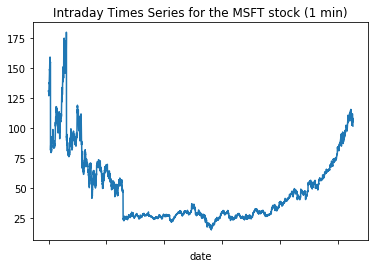

In [5]:
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

In [7]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import os
from myutils.config import config


class FeatureEngineer:
    def __init__(self, sym, api_key):
        self.api_key = api_key

        ts = TimeSeries(key=api_key, output_format='pandas')
        self.full_raw_df, self.meta_data = ts.get_daily(symbol=sym, outputsize='full')
        self.df_new = pd.DataFrame()

        # trading days quantity by time
        self.td_week = 5
        self.td_month = 21
        self.td_year = 252

    def feature_engineer(self):
        self.original_features()
        self.average_close_prices()
        self.average_close_prices()
        self.ratio_comb_average_close_prices()
        self.average_volume()
        self.ratio_comb_average_volume()
        self.average_volitility_close()
        self.ratio_comb_average_volitility_close()
        self.average_volitility_volume()
        self.ratio_comb_average_volitility_volume()
        self.return_()
        self.avg_return()
        self.target()
        self.clean_up()
        return self.df_new

    def original_features(self):
        self.df_new['open'] = self.full_raw_df['1. open']
        self.df_new['open_1'] = self.full_raw_df['1. open'].shift(1)
        self.df_new['close_1'] = self.full_raw_df['4. close'].shift(1)
        self.df_new['high_1'] = self.full_raw_df['2. high'].shift(1)
        self.df_new['low_1'] = self.full_raw_df['3. low'].shift(1)
        self.df_new['volume_1'] = self.full_raw_df['5. volume'].shift(1)

    def average_close_prices(self):
        self.df_new['avg_price_5'] = self.full_raw_df['4. close'].rolling(window=self.td_week).mean().shift(1)
        self.df_new['avg_price_30'] = self.full_raw_df['4. close'].rolling(window=self.td_month).mean().shift(1)
        self.df_new['avg_price_365'] = self.full_raw_df['4. close'].rolling(window=self.td_year).mean().shift(1)

    def ratio_comb_average_close_prices(self):
        self.df_new['ratio_avg_price_5_30'] = self.df_new['avg_price_5'] / self.df_new['avg_price_30']
        self.df_new['ratio_avg_price_5_365'] = self.df_new['avg_price_5'] / self.df_new['avg_price_365']
        self.df_new['ratio_avg_price_30_365'] = self.df_new['avg_price_30'] / self.df_new['avg_price_365']

    def average_volume(self):
        self.df_new['avg_volume_5'] = self.full_raw_df['5. volume'].rolling(window=self.td_week).mean().shift(1)
        self.df_new['avg_volume_30'] = self.full_raw_df['5. volume'].rolling(window=self.td_month).mean().shift(1)
        self.df_new['avg_volume_365'] = self.full_raw_df['5. volume'].rolling(window=self.td_year).mean().shift(1)

    def ratio_comb_average_volume(self):
        self.df_new['ratio_avg_volume_5_30'] = self.df_new['avg_volume_5'] / self.df_new['avg_volume_30']
        self.df_new['ratio_avg_volume_5_365'] = self.df_new['avg_volume_5'] / self.df_new['avg_volume_365']
        self.df_new['ratio_avg_volume_30_365'] = self.df_new['avg_volume_30'] / self.df_new['avg_volume_365']

    def average_volitility_close(self):
        self.df_new['std_price_5'] = self.full_raw_df['4. close'].rolling(window=self.td_week).std().shift(1)
        self.df_new['std_price_30'] = self.full_raw_df['4. close'].rolling(window=self.td_month).std().shift(1)
        self.df_new['std_price_365'] = self.full_raw_df['4. close'].rolling(window=self.td_year).std().shift(1)

    def ratio_comb_average_volitility_close(self):
        self.df_new['ratio_std_price_5_30'] = self.df_new['std_price_5'] / self.df_new['std_price_30']
        self.df_new['ratio_std_price_5_365'] = self.df_new['std_price_5'] / self.df_new['std_price_365']
        self.df_new['ratio_std_price_30_365'] = self.df_new['std_price_30'] / self.df_new['std_price_365']

    def average_volitility_volume(self):
        self.df_new['std_volume_5'] = self.full_raw_df['5. volume'].rolling(window=self.td_week).std().shift(1)
        self.df_new['std_volume_30'] = self.full_raw_df['5. volume'].rolling(window=self.td_month).std().shift(1)
        self.df_new['std_volume_365'] = self.full_raw_df['5. volume'].rolling(window=self.td_year).std().shift(1)

    def ratio_comb_average_volitility_volume(self):
        self.df_new['ratio_std_volume_5_30'] = self.df_new['std_volume_5'] / self.df_new['std_volume_30']
        self.df_new['ratio_std_volume_5_365'] = self.df_new['std_volume_5'] / self.df_new['std_volume_365']
        self.df_new['ratio_std_volume_30_365'] = self.df_new['std_volume_30'] / self.df_new['std_volume_365']

    def return_(self):
        self.df_new['return_1'] = ((self.full_raw_df['4. close'] - self.full_raw_df['4. close'].shift(1)) /
                                   self.full_raw_df['4. close'].shift(1)).shift(1)
        self.df_new['return_5'] = ((self.full_raw_df['4. close'] - self.full_raw_df['4. close'].shift(self.td_week)) /
                                   self.full_raw_df['4. close'].shift(self.td_week)).shift(1)
        self.df_new['return_30'] = ((self.full_raw_df['4. close'] - self.full_raw_df['4. close'].shift(self.td_month)) /
                                    self.full_raw_df['4. close'].shift(self.td_month)).shift(1)

    def avg_return(self):
        self.df_new['avg_return_1_5'] = self.df_new['return_1'].rolling(window=self.td_week).mean().shift(1)
        self.df_new['avg_return_5_30'] = self.df_new['return_5'].rolling(window=self.td_month).mean().shift(1)
        self.df_new['avg_return_30_365'] = self.df_new['return_30'].rolling(window=self.td_year).mean().shift(1)

    def target(self):
        self.df_new['close'] = self.full_raw_df['4. close']

    def clean_up(self):
        # drop any row that contains at least one N/A (as a result from shifting)
        self.df_new = self.df_new.dropna(axis=0)


symbol = 'MSFT'

root_path = os.path.join(config['data_dir'], 'stock-prices')
full_path = os.path.join(root_path, f'{symbol}_past_decade.csv')
if not os.path.exists(full_path):
    os.makedirs(os.path.join(root_path))
    print('Generating new datafile.')
    fe = FeatureEngineer(sym=symbol, api_key='RNESW3JHJV7CI0V5')
    new_df = fe.feature_engineer()
    new_df.to_csv(full_path, index=False)


Generating new datafile.


In [8]:
stock_df = pd.read_csv(full_path)
stock_df.head(3)

,open,open_1,close_1,high_1,low_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_volume_5_30,ratio_std_volume_5_365,ratio_std_volume_30_365,return_1,return_5,return_30,avg_return_1_5,avg_return_5_30,avg_return_30_365,close
0,168.13,166.38,166.81,169.88,166.00,18437300.0,171.276,157.828571,109.943532,1.085203,...,0.303158,0.283938,0.936601,-0.004892,-0.010793,0.183050,-0.004392,0.050420,0.031841,159.06
1,160.25,168.13,159.06,168.38,158.88,22287900.0,168.288,158.426667,109.952460,1.062245,...,0.334975,0.311511,0.929952,-0.046460,-0.085862,0.085734,-0.001955,0.050158,0.031819,160.00
2,162.56,160.25,160.00,161.63,154.88,31986300.0,165.288,158.843333,109.970556,1.040572,...,0.860833,0.868032,1.008362,0.005910,-0.085714,0.057851,-0.017616,0.044692,0.031354,165.25


## Linear Regression

A linear model is represented as follows: $y = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n = w^Tx$

Where
* $w_0$ is the bias weight. This weight shifts the initial position of the regression model as a 'bias' so we it can get a comfortable start.
* $w_n$ = weights or coefficients. These weights determine the slope of the features.
* $x_n$ = the feature vector. In our case we have about 30 engineer features.

There are a couple of observations that we could make from the model:
* Together the model forms a hyper plane.
* The regression model is the same logistic regression model without the additional logistical unit to make the values discrete.


## Learning the Weights

There exists a configurations of weights $w$ such that when applied to our model, most optimially predicts our output variable. So out of this observation, immediately brings out two different question.

1. How do we define what is optimal?
2. How do we leverage the information we have to efficiently discover these weights?

**Answer to Question 1**

There are many ways we can define what it means to be optimial, but one most obvious ways is measuring how far the predicted measurement was from the estimate. And so with this in mind we come up with our cost function $J(w)$

$J(w) = \frac{1}{m} \sum_{i=1}^m \frac{1}{2}(\hat{y}(x^{(i)}) - y^{(i)})^2$

Some observations here:
* $\frac{1}{m}$ does not matter here because it is a constant. In otherwords, it will not change relative to all the other weights. However, we include because it provides a more elegent interpretation to the cost function: the average distance we are off from all the target variables.
* Adding $\frac{1}{2}$ makes differentiation simplier (cancels with the power of 2).
* $\hat{y}(x^{(i)})$ is the models prediction based on the current set of weights, also $=w^Tx$.


**Answer to Question 2**

With gradient descent we can iteratively converge to the optimal solution. For a more detailed overview of the algorithm, refer to the [Gradient Descent chapter](todo). 

The first order derivative of our cost function is: $\nabla w = \frac{1}{m} \sum_{i=1}^m (\hat{y}(x^{(i)}) - y^{(i)})x^{(i)}$

This defines where $w$, should go at any instance of x. So if we put it all together, we get: $w := w + \nabla \frac{1}{m} \sum_{i=1}^m (\hat{y}(x^{(i)}) - y^{(i)})x^{(i)}$. This just means take the current instance of w and change it to the degree defined by the alpha and the gradient.

Over several iterations, as per the process of gradient descent, we get a set of learned weights it is ultimately these set of weights that define our final model: $y' = w^Tx'$


## Implementation

In [9]:
import numpy as np


def y_hat(X, weights):
    """
    obj: predict the target given input X and defining weights
    as defined by y = w_1x_1 + w_2x_2 + ... + w_nx_n
    :param X: ndarray - rows of input for every feature
    :param weights: array - weights
    """
    predictions = np.dot(X, weights)
    return predictions


def gd_step(X_train, y_train, weights, alpha):
    """
    obj: update the weights through a single gradient descent step
    using the training data
    :param X_train: ndarray - input data
    :param y_train: array - true target values
    :param weights: array - current set of coefficients
    :param alpha: float - learning rate
    """
    # given the current predictions
    predictions = y_hat(X_train, weights)
    # move w towards the direction that that minimizes it as defined through the first derivative
    weights_delta = np.dot(X_train.T, y_train - predictions)
    # m = number of samples
    m = y_train.shape[0]
    # update the weights
    weights += (alpha / float(m)) * weights_delta
    return weights


def J(X, y, weights):
    """
    obj: compute the total cost - to define the performance of our model
    :param X: ndarray - input data
    :param y: array - true target values
    :param weights: array - current set of coefficients
    """
    predictions = y_hat(X, weights)
    cost = np.mean(np.power((predictions - y), 2) / 2.0)
    return cost


def gd(X_train, y_train, max_iter, weights, alpha):
    """
    obj: gradient descent algorithm
    :param X_train: ndarray - input data
    :param y_train: array - true target values
    :param max_iter: int - number of times to iterate down cost function
    :param alpha: int - learning rate
    """
    for i in range(max_iter):
        weights = gd_step(X_train, y_train, weights, alpha)
        # check the cost for every 100 iterations
        if i % 100 == 0:
            print(f'iteration {i} cost: ', J(X_train, y_train, weights))


def train_linear_regression(X_train, y_train, max_iter, alpha, fit_intercept=True):
    """
    obj: trains a linear regression model, by outputing its character or weights
    :param X_train: ndarray - input data
    :param y_train: array - true target values
    :param max_iter: int - number of times to iterate down cost function
    :param alpha: int - learning rate
    :param fit_intercept: bool - whether or not to include w_0x_0 in the model
    """
    # add a column of ones to the features space to introduce constant w_0 as a consequence
    n_rows = X_train.shape[0]
    if fit_intercept:
        intercept = np.ones((n_rows, 1))
        X_train = np.hstack((intercept, X_train))

    n_features = X_train.shape[1]
    weights = np.zeros(n_features).T
    gd(X_train, y_train, max_iter, weights, alpha)
    return weights


def predict(X, weights):
    """
    obj: given a final set of input weights, compute the y_hat prediction values
    :param X: ndarray - input matrix
    :param weights: array - linear model weights
    """
    # detect of the intercept was fitted
    n_features_X, n_rows = X.shape[1], X.shape[0]
    n_features_w = weights.shape[0]
    if n_features_X == n_features_w - 1:
        intercept = np.ones((n_features_X, 1))
        X = np.hstack((intercept, X))
    return y_hat(X, weights)

### Testing with a Small Example

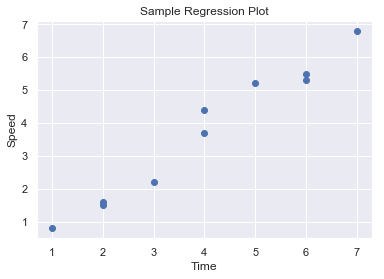

In [10]:
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb


X_train = np.array([[6], [2], [3], [4], [1], [5], [2], [6], [4], [7]])
y_train = np.array([5.5, 1.6, 2.2, 3.7, 0.8, 5.2, 1.5, 5.3, 4.4, 6.8])

plt.plot(X_train, y_train, 'o')
plb.xlabel('Time')
plb.ylabel('Speed')
plb.title('Sample Regression Plot')
plt.show()

In [11]:
trained_weights = train_linear_regression(X_train, y_train, max_iter=1000, alpha=.01)
print('optimized coefficients: ', trained_weights)

iteration 0 cost:  5.571972628
iteration 100 cost:  0.08086015122228847
iteration 200 cost:  0.07548404733627607
iteration 300 cost:  0.07170632283789724
iteration 400 cost:  0.06905176059575331
iteration 500 cost:  0.06718643116253492
iteration 600 cost:  0.06587568627240162
iteration 700 cost:  0.06495464136933257
iteration 800 cost:  0.06430743402955555
iteration 900 cost:  0.06385264910075839
optimized coefficients:  [-0.25361262  0.99240578]


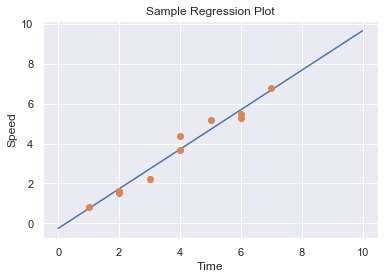

In [13]:
from myutils.draw.plot import plt_2d_functions

b, m = trained_weights
plt_2d_functions([lambda x: b + m*x], np.arange(0, 10, .01))
plt.plot(X_train, y_train, 'o')
plb.xlabel('Time')
plb.ylabel('Speed')
plb.title('Sample Regression Plot')
plt.show()

### Lessons Learned
* Keep your alpha small! You would consequentally cause gradient descent to over step the direction of its prediction, and then it would cascade and overflow.
* Keep X as a matrix shape, and column vectors as normal row vectors. 

### Other Things to Keep in Mind
* Of course, just as in the logistic regression version, we can apply stochastic level gradient descent for more efficient (and sometimes more performant) models.

## Regression Example with Sklearn using SGD (Stochastic Gradient Descent)

In this example, we will be optimizing our weights via `squared_loss`, just as we've been doing. An additional `penalty` is imposed as an `l2` regularization. A `constant` `learning_rate` implies that $\alpha$ does not change over the course of the training period.

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor


data = datasets.load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regressor = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, learning_rate='constant', max_iter=10000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

One option for evaluating regression performance is using $r^2$ `score`.

In [1]:
from sklearn.metrics import r2_score


r2_score(y_test, y_pred)

NameError: name 'y_test' is not defined

# Regression Performance Evaluation

Like with any model, there are many different ways to measure its overall predictive ability. Using `RMSE`, `MAE` and `R^2` we will demonstrate regression forest performance evaluation.

In [3]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor


# build a model using grid search to identify the optimal parameters
param_grid = {
    'alpha': [1e-07, 1e-06, 1e-05],
    'eta0': [0.001, 0.005, 0.01],
    'max_iter': [300, 1000, 3000], 
    'average': [True, False],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'fit_intercept': [True, False],
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['none', 'l2', 'l1', 'elasticnet']
}

grid_search = GridSearchCV(SGDRegressor(early_stopping=True), param_grid, cv=3, n_jobs=-1, verbose=10)
grid_search.fit(X_train, y_train)
grid_search.best_params_

"""
Optimal params, saved to disk::

{'alpha': 1e-07,
 'average': True,
 'eta0': 0.001,
 'fit_intercept': True,
 'learning_rate': 'adaptive',
 'loss': 'epsilon_insensitive',
 'max_iter': 3000,
 'penalty': 'none'}
"""

/Users/danielm/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


{'alpha': 1e-07,
 'average': True,
 'eta0': 0.001,
 'fit_intercept': True,
 'learning_rate': 'adaptive',
 'loss': 'epsilon_insensitive',
 'max_iter': 3000,
 'penalty': 'none'}

In [6]:
predictions = grid_search.best_estimator_.predict(X_test)

Now make the predictions on the basis of these metrics

In [7]:
from sklearn import metrics


mse_score = metrics.mean_squared_error(y_test, predictions)
mae_score = metrics.mean_absolute_error(y_test, predictions)
r2_score = metrics.r2_score(y_test, predictions)

print(f'mse_score: {mse_score}')
print(f'mae_score: {mae_score}')
print(f'r2_score: {r2_score}')

mse_score: 28.003036126308196
mae_score: 3.972424282686197
r2_score: 0.6299737306068182
